In [42]:
import os
import numpy as np
from PIL import Image
from src.data_handling.mmg_detection_datasets import *
from src.visualizations.plot_image import plot_image_opencv_fit_window
from src.data_augmentation.breast_density.data.resize_image import *
import torch

from src.preprocessing.histogram_standardization import get_hist_stand_landmarks, apply_hist_stand_landmarks



pathologies = None #['mass', 'calcifications', 'suspicious_calcifications', 'architectural_distortion'] # None to select all
status = ['Normal', 'Benign', 'Malignant'] #['Normal'] 
# Resize images keeping aspect ratio

# Call to the OPTIMAM Dataloader
csv_path = '/home/akis-linardos/Datasets/CMMD_subset/info.csv'
subset_csv_path = '/home/akis-linardos/Datasets/CMMD_subset/info.csv'

In [33]:
csv = pd.read_csv(csv_path, index_col=[0])
# csv=csv.drop(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1'],axis=1)
# csv.to_csv(csv_path)


In [34]:
ben_sub = csv[csv['status']=='Benign'][:50]
mal_sub = csv[csv['status']=='Malignant'][:50]
subset_csv = pd.concat([ben_sub, mal_sub], ignore_index=True, sort=False)

In [35]:
subset_csv.to_csv(subset_csv_path)

In [37]:
subset_csv

,series_id,Collection,3rd Party Analysis,Data Description URI,patient_id,study_id,Study Description,Study Date,Series Description,manufacturer,...,SOP Class UID,Number of Images,File Size,scan_path,Download Timestamp,status,pathology,laterality,view,image_id
0,1.3.6.1.4.1.14519.5.2.1.1239.1759.292560899611...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0003,1.3.6.1.4.1.14519.5.2.1.1239.1759.113089024322...,NaN,07-18-2011,NaN,NaN,...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,CMMD/D1-0003/07-18-2011-NA-NA-25491/1.000000-N...,2022-02-22T14:26:56.454,Benign,calcification,L,CC,0
1,1.3.6.1.4.1.14519.5.2.1.1239.1759.292560899611...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0003,1.3.6.1.4.1.14519.5.2.1.1239.1759.113089024322...,NaN,07-18-2011,NaN,NaN,...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,CMMD/D1-0003/07-18-2011-NA-NA-25491/1.000000-N...,2022-02-22T14:26:56.454,Benign,calcification,L,MLO,1
2,1.3.6.1.4.1.14519.5.2.1.1239.1759.623006463861...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0001,1.3.6.1.4.1.14519.5.2.1.1239.1759.335790956129...,NaN,07-18-2010,NaN,NaN,...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,CMMD/D1-0001/07-18-2010-NA-NA-79377/1.000000-N...,2022-02-22T14:26:57.31,Benign,calcification,R,CC,2
3,1.3.6.1.4.1.14519.5.2.1.1239.1759.623006463861...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0001,1.3.6.1.4.1.14519.5.2.1.1239.1759.335790956129...,NaN,07-18-2010,NaN,NaN,...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,CMMD/D1-0001/07-18-2010-NA-NA-79377/1.000000-N...,2022-02-22T14:26:57.31,Benign,calcification,R,MLO,3
4,1.3.6.1.4.1.14519.5.2.1.1239.1759.411712488433...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0005,1.3.6.1.4.1.14519.5.2.1.1239.1759.249693111563...,NaN,07-18-2011,NaN,NaN,...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,CMMD/D1-0005/07-18-2011-NA-NA-52347/1.000000-N...,2022-02-22T14:27:01.533,Benign,calcification,R,CC,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.3.6.1.4.1.14519.5.2.1.1239.1759.274348560214...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0091,1.3.6.1.4.1.14519.5.2.1.1239.1759.204758927278...,NaN,07-18-2010,NaN,NaN,...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,CMMD/D1-0091/07-18-2010-NA-NA-16258/1.000000-N...,2022-02-22T14:29:38.768,Malignant,calcification,L,MLO,141
96,1.3.6.1.4.1.14519.5.2.1.1239.1759.155861235739...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0101,1.3.6.1.4.1.14519.5.2.1.1239.1759.131657589342...,NaN,07-18-2010,NaN,NaN,...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,CMMD/D1-0101/07-18-2010-NA-NA-36396/1.000000-N...,2022-02-22T14:29:42.648,Malignant,calcification,R,CC,146
97,1.3.6.1.4.1.14519.5.2.1.1239.1759.155861235739...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0101,1.3.6.1.4.1.14519.5.2.1.1239.1759.131657589342...,NaN,07-18-2010,NaN,NaN,...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,CMMD/D1-0101/07-18-2010-NA-NA-36396/1.000000-N...,2022-02-22T14:29:42.648,Malignant,calcification,R,MLO,147
98,1.3.6.1.4.1.14519.5.2.1.1239.1759.512773095947...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0103,1.3.6.1.4.1.14519.5.2.1.1239.1759.478649296439...,NaN,07-18-2010,NaN,NaN,...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,CMMD/D1-0103/07-18-2010-NA-NA-79651/1.000000-N...,2022-02-22T14:29:46.501,Malignant,calcification,L,CC,148


In [ ]:
from distutils.dir_util import copy_tree
for patient_id in subset_csv['patient_id']:
    from_directory = "/home/akis-linardos/Datasets/CMMD/"+patient_id
    to_directory = '/home/akis-linardos/Datasets/CMMD_subset/'+patient_id
    


    copy_tree(from_directory, to_directory)
    # break

In [36]:
import pandas as pd

dataset_path = '/home/akis-linardos/Datasets'
cmmd_clients = CMMDDataset(subset_csv_path, dataset_path, load_max=-1)
ROOT_DATA_PATH = '/home/akis-linardos/Datasets'
# Call to the OPTIMAM Dataloader

for status in ['Normal', 'Benign', 'Malignant']:
    clients_selected = cmmd_clients.get_clients_by_status(status)
    print(f'Total clients selected by status ({status}): {len(clients_selected)}')

Total clients selected by status (Normal): 0
Total clients selected by status (Benign): 24
Total clients selected by status (Malignant): 24


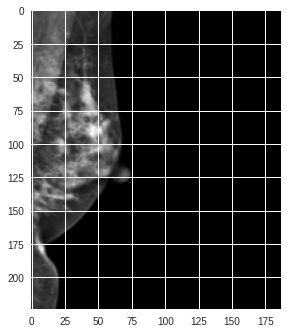

In [ ]:
plt.imshow(image, cmap='gray')

In [ ]:
image.shape

(224, 187)

In [ ]:
a = np.zeros((30, 30, 30, 20),dtype=np.uint8)
a[2:-2, 2:-2, 2:-2, 2:-2] = np.random.randint(0,255,(26,26,26,16),dtype=np.uint8)

/home/akis-linardos/BFP/docker/fl_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


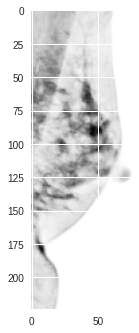

In [ ]:
plt.imshow(crop_new(image))

In [ ]:
crop_new(image).shape

/home/akis-linardos/BFP/docker/fl_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


(224, 76)

In [ ]:
paddedimg = torch.zeros(224,187)
h,w = image.shape
paddedimg[-h:,-w:]=image

TypeError: can't assign a numpy.ndarray to a torch.FloatTensor

In [ ]:
images_benign[0]

In [ ]:
479+1295

1774

In [ ]:
cmmd_clients.total_images()

5198

In [ ]:
images_benign, images_normal, images_malignant = [], [], []
for c in cmmd_clients:
    for lists, status in zip([images_normal, images_benign, images_malignant], ['Normal', 'Benign', 'Malignant']):
        client_images_by_status = c.get_images_by_status(status=[status])
        for image in client_images_by_status:
            lists.append(image)
count_dict = {'Normal':0,'Benign':0, 'Malignant':0}      
for l, status in zip([images_normal, images_benign, images_malignant], ['Normal', 'Benign', 'Malignant']):
    print(f'Printing status {status}:')
    for i in l:
        # print(i.status)
        count_dict[status]+=1
    print(count_dict[status])

Printing status Normal:
0
Printing status Benign:
1108
Printing status Malignant:
4090
